In [1]:
import pandas as pd

In [2]:
ds=pd.read_csv('Churn_Modelling.csv')

In [3]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
y=ds['Exited']

In [5]:
ds.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
X=ds[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [14]:
#ohe
geo=pd.get_dummies(ds['Geography'],drop_first=True)

In [15]:
geo

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
#ohe
gender=pd.get_dummies(ds['Gender'],drop_first=True)

In [17]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [18]:
X_final = pd.concat([geo,gender,X],axis=1)

In [19]:
X_final.head(10)

,Germany,Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10
5,0,1,1,645,44,8,113755.78,2,1,0,149756.71
6,0,0,1,822,50,7,0.00,2,1,1,10062.80
7,1,0,0,376,29,4,115046.74,4,1,0,119346.88
8,0,0,1,501,44,4,142051.07,2,0,1,74940.50
9,0,0,1,684,27,2,134603.88,1,1,1,71725.73


In [21]:
from  sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_final, y, test_size=0.20,random_state=42)

In [24]:
from keras.models import Sequential

In [25]:
model=Sequential()

In [26]:
model.get_config()

{'name': 'sequential', 'layers': []}

In [27]:
from keras.layers import Dense


In [29]:
model.add(Dense(units=8,input_dim=11,kernel_initializer='zeros',bias_initializer='zeros',activation='relu'))

In [30]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.get_layer('dense').get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)]

In [35]:
model.add(Dense(units=6,kernel_initializer='GlorotNormal',bias_initializer='zeros',activation='relu'))

In [39]:
model.get_layer('dense_1').get_weights()

[array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [40]:
model.add(Dense(units=1,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________


In [43]:
from keras.optimizers import Adam

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0000001),loss='binary_crossentropy')

In [45]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 781us/step - loss: 0.6931
Epoch 2/100
250/250 [==============================] - 0s 796us/step - loss: 0.6931
Epoch 3/100
250/250 [==============================] - 0s 753us/step - loss: 0.6931
Epoch 4/100
250/250 [==============================] - 0s 788us/step - loss: 0.6931
Epoch 5/100
250/250 [==============================] - 0s 714us/step - loss: 0.6931
Epoch 6/100
250/250 [==============================] - 0s 771us/step - loss: 0.6931
Epoch 7/100
250/250 [==============================] - 0s 776us/step - loss: 0.6931
Epoch 8/100
250/250 [==============================] - 0s 764us/step - loss: 0.6931
Epoch 9/100
250/250 [==============================] - 0s 753us/step - loss: 0.6931
Epoch 10/100
250/250 [==============================] - 0s 832us/step - loss: 0.6931
Epoch 11/100
250/250 [==============================] - 0s 886us/step - loss: 0.6931
Epoch 12/100
250/250 [==============================] - 0s 916us/step - lo

250/250 [==============================] - 0s 740us/step - loss: 0.6925
Epoch 98/100
250/250 [==============================] - 0s 884us/step - loss: 0.6924
Epoch 99/100
250/250 [==============================] - 0s 897us/step - loss: 0.6924
Epoch 100/100
250/250 [==============================] - 0s 864us/step - loss: 0.6924


In [47]:
l=pd.DataFrame(model.history.history)

<AxesSubplot:>

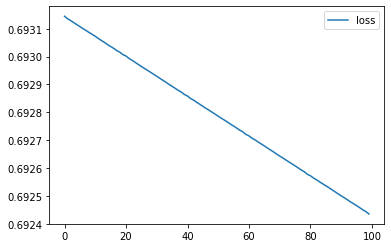

In [48]:
l.plot()